# Initial Imports

In [5]:
# !pip install pandas-profiling==2.7.1

In [4]:
import pandas as pd
import numpy as np
import scipy.stats as spstats
from collections import namedtuple, defaultdict
from pathlib import Path

import pandas_profiling as pp
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.feature_selection import SelectKBest, chi2
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import GridSearchCV

from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler,SMOTE

from sklearn.metrics import accuracy_score, confusion_matrix ,classification_report,f1_score, roc_auc_score
# Models
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier,BaggingClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix ,classification_report,f1_score


#EDA & Data Preprocessing

In [5]:
df=pd.read_csv("Data Science HW design model.csv")

In [35]:
df

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16,A17,A18,A19,A20,A21,A22,A23,A24,A25,A26,A27,A28,A29,A30,default
0,10.69,86.10,8920.16,19912.85,30.42,31.72,1.18,145.41,2.236,1.786,84.29,13.46,16.01,52.18,123101.84,0.23,4305.85,0.15,0.09,1.09,10,0.01,0.01,0.01,0.13,0.00,0.00,0.00,0.00,0.00,0
1,28.50,65.19,6564.00,6716.67,32.50,23.40,2.74,91.11,1.000,1.000,59.80,8.18,29.33,63.55,34275.73,0.80,3616.67,0.78,0.14,1.67,35,0.06,0.01,0.00,0.09,285.80,0.00,16.44,1.98,42.26,0
2,24.87,73.79,4285.47,6463.75,40.50,51.53,2.84,93.90,2.400,1.400,77.17,10.25,39.92,61.95,84841.79,0.78,2301.54,0.62,0.15,2.80,31,0.08,0.02,0.02,0.44,494.62,135.41,127.45,46.00,14.92,0
3,13.64,85.82,6887.56,9244.44,49.56,53.44,0.36,171.45,1.875,2.167,95.88,15.38,49.80,67.22,145261.11,0.09,3419.60,0.09,0.00,1.00,29,0.03,0.01,0.00,0.05,1015.19,0.00,210.63,92.58,0.00,0
4,4.50,95.92,8746.50,19987.50,32.75,37.88,0.92,153.25,2.000,1.500,94.55,11.87,17.43,50.70,120522.80,0.17,3828.57,0.08,0.00,2.69,22,0.01,0.00,0.00,0.04,0.00,106.41,79.00,0.00,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93995,8.18,92.55,4305.29,5420.00,30.60,34.43,0.73,76.67,0.000,0.000,100.00,6.82,35.50,30.60,16063.00,0.36,3050.00,0.22,0.11,2.25,28,0.20,0.04,0.04,0.04,0.00,0.00,0.00,0.00,0.00,1
93996,13.22,84.14,7614.67,14460.69,32.74,34.75,1.85,117.22,2.287,1.852,83.49,10.78,18.81,55.80,106855.62,0.27,4041.31,0.18,0.10,1.88,22,0.07,0.01,0.01,0.28,221.97,0.00,9.93,15.87,63.74,1
93997,14.91,85.36,4628.71,6070.00,31.30,39.43,2.09,135.70,3.000,2.000,90.78,11.84,10.00,47.82,23114.64,0.73,3078.57,0.40,0.44,1.82,97,0.44,0.06,0.04,0.23,468.81,265.85,44.89,12.76,52.39,1
93998,10.77,85.94,8540.43,19452.79,29.92,30.77,1.24,147.39,2.013,1.392,84.18,12.98,14.86,49.22,102753.17,0.27,4769.85,0.20,0.09,1.29,151,0.13,0.01,0.02,0.10,83.90,1034.35,281.25,53.10,0.00,1


In [8]:
df.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16,A17,A18,A19,A20,A21,A22,A23,A24,A25,A26,A27,A28,A29,A30,default
0,10.69,86.10,8920.16,19912.85,30.42,31.72,1.18,145.41,2.236,1.786,84.29,13.46,16.01,52.18,123101.84,0.23,4305.85,0.15,0.09,1.09,10,0.01,0.01,0.01,0.13,0.00,0.00,0.00,0.00,0.00,0
1,28.50,65.19,6564.00,6716.67,32.50,23.40,2.74,91.11,1.000,1.000,59.80,8.18,29.33,63.55,34275.73,0.80,3616.67,0.78,0.14,1.67,35,0.06,0.01,0.00,0.09,285.80,0.00,16.44,1.98,42.26,0
2,24.87,73.79,4285.47,6463.75,40.50,51.53,2.84,93.90,2.400,1.400,77.17,10.25,39.92,61.95,84841.79,0.78,2301.54,0.62,0.15,2.80,31,0.08,0.02,0.02,0.44,494.62,135.41,127.45,46.00,14.92,0
3,13.64,85.82,6887.56,9244.44,49.56,53.44,0.36,171.45,1.875,2.167,95.88,15.38,49.80,67.22,145261.11,0.09,3419.60,0.09,0.00,1.00,29,0.03,0.01,0.00,0.05,1015.19,0.00,210.63,92.58,0.00,0
4,4.50,95.92,8746.50,19987.50,32.75,37.88,0.92,153.25,2.000,1.500,94.55,11.87,17.43,50.70,120522.80,0.17,3828.57,0.08,0.00,2.69,22,0.01,0.00,0.00,0.04,0.00,106.41,79.00,0.00,0.00,0


In [9]:
df.describe()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16,A17,A18,A19,A20,A21,A22,A23,A24,A25,A26,A27,A28,A29,A30,default
count,94000.000000,94000.000000,94000.000000,94000.000000,94000.000000,94000.000000,94000.000000,94000.000000,94000.000000,94000.000000,94000.000000,94000.000000,94000.000000,94000.000000,9.400000e+04,94000.000000,94000.000000,94000.000000,94000.000000,94000.000000,94000.000000,94000.000000,94000.000000,94000.000000,94000.000000,94000.000000,94000.000000,94000.000000,94000.000000,94000.000000,94000.000000
mean,12.134211,83.838361,7319.620881,13449.501569,33.507640,36.983300,1.518232,124.108845,1.697824,1.407075,82.561804,11.364377,20.453328,55.172549,1.036205e+05,0.282347,4113.993992,0.190747,0.112162,1.545606,53.707096,0.074435,0.008550,0.013537,0.133531,290.756534,357.976444,103.482568,28.847016,38.509910,0.042553
std,6.587858,8.672843,2652.539364,8197.452662,11.906865,14.209314,1.007398,33.130292,0.776810,0.652138,10.740732,2.767727,11.671429,12.015331,5.954836e+04,0.252047,1300.549863,0.181137,0.142458,0.627285,56.617973,0.138356,0.020052,0.029078,0.156658,471.958770,597.594147,136.248095,62.759062,90.882963,0.201849
min,0.000000,20.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.460000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-0.010000,-0.020000,-0.020000,0.000000,-751.260000,-405.370000,-616.230000,-490.160000,-719.720000,0.000000
25%,7.670000,79.000000,5618.627500,8700.000000,26.880000,28.780000,0.820000,103.027500,1.272000,1.000000,77.270000,9.640000,13.600000,49.070000,6.562992e+04,0.130000,3422.220000,0.080000,0.000000,1.140000,19.000000,0.010000,0.000000,0.000000,0.060000,0.000000,0.000000,14.970000,0.000000,0.000000,0.000000
50%,12.020000,84.360000,7285.590000,11862.650000,32.770000,35.940000,1.420000,127.240000,1.667000,1.399000,83.340000,11.330000,19.110000,55.190000,9.074253e+04,0.250000,4050.000000,0.170000,0.090000,1.450000,39.000000,0.030000,0.000000,0.010000,0.090000,115.140000,102.265000,59.350000,10.500000,0.000000,0.000000
75%,16.080000,89.670000,8780.870000,15896.575000,39.100000,43.830000,2.020000,143.100000,2.064000,1.714000,89.010000,12.790000,25.170000,61.810000,1.282739e+05,0.360000,4668.192500,0.250000,0.140000,1.860000,69.000000,0.080000,0.010000,0.010000,0.140000,380.142500,485.880000,140.952500,34.860000,49.862500,0.000000
max,62.710000,100.000000,26333.500000,170300.000000,146.000000,146.000000,18.670000,524.000000,44.000000,44.000000,100.000000,35.430000,237.000000,146.000000,1.079286e+06,7.000000,20000.000000,3.250000,5.000000,8.100000,1902.000000,5.300000,0.700000,1.690000,4.080000,15288.660000,19503.760000,3265.980000,6561.930000,13487.000000,1.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94000 entries, 0 to 93999
Data columns (total 31 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   A1       94000 non-null  float64
 1   A2       94000 non-null  float64
 2   A3       94000 non-null  float64
 3   A4       94000 non-null  float64
 4   A5       94000 non-null  float64
 5   A6       94000 non-null  float64
 6   A7       94000 non-null  float64
 7   A8       94000 non-null  float64
 8   A9       94000 non-null  float64
 9   A10      94000 non-null  float64
 10  A11      94000 non-null  float64
 11  A12      94000 non-null  float64
 12  A13      94000 non-null  float64
 13  A14      94000 non-null  float64
 14  A15      94000 non-null  float64
 15  A16      94000 non-null  float64
 16  A17      94000 non-null  float64
 17  A18      94000 non-null  float64
 18  A19      94000 non-null  float64
 19  A20      94000 non-null  float64
 20  A21      94000 non-null  int64  
 21  A22      940

In [11]:
# prof=pp.ProfileReport(df)
# prof.to_file(output_file='output.html')

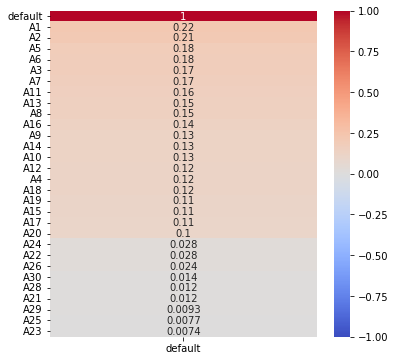

In [12]:
plt.figure(figsize=(6,6))
sns.heatmap(df.corr()[['default']].abs().sort_values(by=['default'],ascending=False)[:30], vmin=-1, cmap='coolwarm', annot=True);

In [6]:
#dropping duplicate rows

df.drop_duplicates(keep=False, inplace=True)
# duplicate = data[data.duplicated()]

In [14]:
df.columns

Index(['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11',
       'A12', 'A13', 'A14', 'A15', 'A16', 'A17', 'A18', 'A19', 'A20', 'A21',
       'A22', 'A23', 'A24', 'A25', 'A26', 'A27', 'A28', 'A29', 'A30',
       'default'],
      dtype='object')

In [15]:
#counting zeros in each column

# for column_name in df.columns:
#     column = df[column_name]
#     # Get the count of Zeros in column 
#     count = (column == 0).sum()
#     print('Count of zeros in column ', column_name, ' is : ', count)

In [16]:
#replaceing zeros with mean of columns with zeros more than 13%

# cols = ['A16', 'A18', 'A19','A23', 'A24', 'A26', 'A27', 'A28', 'A29', 'A30']
# df[cols]=df[cols].replace(0,df.mean(axis=0))

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


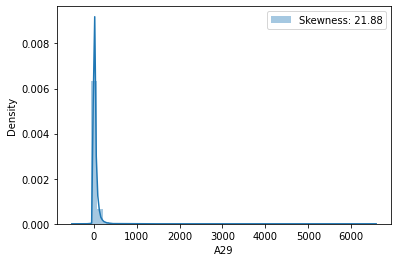

In [7]:
#Finiding skewness in columns A29
t=sns.distplot(df["A29"],label="Skewness: %.2f"%(df["A29"].skew()) )
t.legend()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


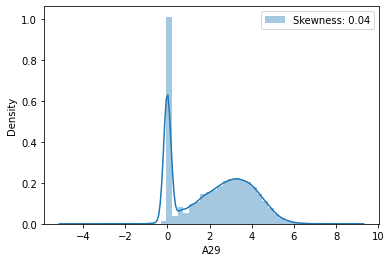

In [8]:
#Handeling skewness A29 using Log Transform method
Log_A29 = df["A29"].map(lambda i: np.log(i) if i > 0 else 0)
t=sns.distplot(Log_A29,label="Skewness: %.2f"%(Log_A29.skew()) )
t.legend()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


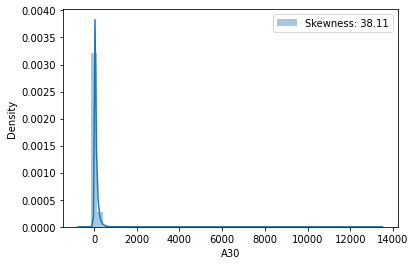

In [9]:
#Finiding skewness in columns A30
t=sns.distplot(df["A30"],label="Skewness: %.2f"%(df["A30"].skew()) )
t.legend()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


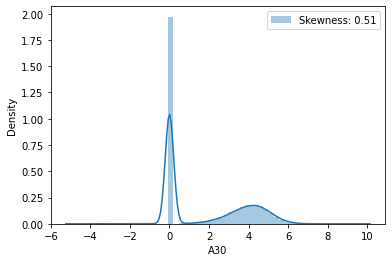

In [10]:
#Handeling skewness A30 using Log Transform method
Log_A30 = df["A30"].map(lambda i: np.log(i) if i > 0 else 0)
t=sns.distplot(Log_A30,label="Skewness: %.2f"%(Log_A30.skew()) )
t.legend()

In [11]:
x=df[df.columns.difference(['default'])]
y=df['default']

In [22]:
model= ExtraTreesClassifier()
model.fit(x,y)
print (model.feature_importances_)


[0.06024739 0.02988767 0.03627239 0.03272942 0.03474404 0.03322407
 0.03349995 0.03263867 0.03409953 0.03189764 0.0305037  0.04777638
 0.03205677 0.03207572 0.02944485 0.02130519 0.02438412 0.03183928
 0.02821414 0.02957149 0.02985008 0.02987937 0.03688999 0.02555636
 0.03416886 0.03749419 0.04013901 0.03501258 0.03444773 0.03014942]


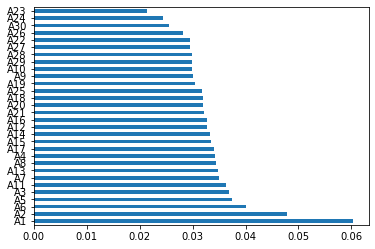

In [23]:
feat_importances= pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(30).plot(kind='barh')

plt.show()

In [24]:
# x=x[['A1','A2','A5','A11','A3','A6','A13','A7','A8','A17','A14','A4','A15','A12','A16','A21','A20','A18','A25']].copy()    

In [12]:
#Data imbalance
count_0 = (y == 0).sum()
count_1 = (y == 1).sum()
count_0,count_1

(89998, 4000)

In [13]:
# sam = RandomOverSampler(sampling_strategy='minority')
# x_over, y_over = sam.fit_resample(x, y)
#Synthetic Minority Oversampling Technique
sam = SMOTE(sampling_strategy='minority')
x_over, y_over = sam.fit_resample(x, y)

In [14]:
x,y=x_over, y_over

In [15]:
rs_count_0 = (y_over == 0).sum()
rs_count_1 = (y_over == 1).sum()

rs_count_0,rs_count_1

(89998, 89998)

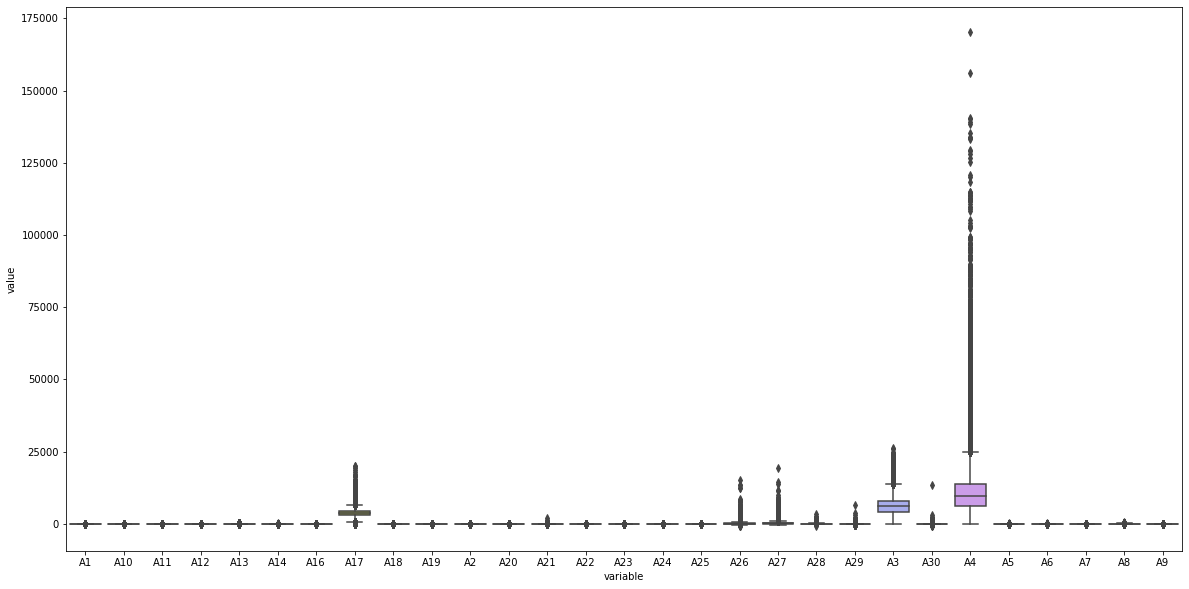

In [32]:
bp=x[x.columns.difference(['A15'])]

fig = plt.figure(figsize =(20, 10))
 
sns.boxplot(x="variable", y="value", data=pd.melt(bp))

# show plot
plt.show()

In [34]:
# export = pd.concat([x, y], axis=1, join='inner')
# export.to_csv("processed_data.csv")

# Modeling

## Logistic Regression

In [29]:
# Using Logistic regression for Binary Classification
scaler = StandardScaler()

reg_lr = LogisticRegression()
reg_lr.fit(x, y)

lr = LogisticRegression(solver = 'lbfgs')

model_lr = Pipeline([('standardize', scaler),
                    ('log_reg', lr)])
model_lr.fit(x, y)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Pipeline(steps=[('standardize', StandardScaler()),
                ('log_reg', LogisticRegression())])

In [30]:
# Accuracy for Train Split
y_train_reg_lr = reg_lr.predict(x)
y_train_reg_lr_scale = model_lr.predict(x)

train_accuracy_reg_lr = accuracy_score(y, y_train_reg_lr)*100
train_accuracy_reg_lr_scale = accuracy_score(y, y_train_reg_lr_scale)*100

print('Confusion matrix:\n', confusion_matrix(y, y_train_reg_lr))
print('f1 score:', (f1_score(y, y_train_reg_lr))*100)
print('Training accuracy: %.4f %%' % train_accuracy_reg_lr)

print()
print('Confusion matrix:\n', confusion_matrix(y, y_train_reg_lr_scale))
print('f1 score:', (f1_score(y, y_train_reg_lr_scale))*100)
print('Training accuracy scaled: %.4f %%' % train_accuracy_reg_lr_scale)


Confusion matrix:
 [[64124 25874]
 [26673 63325]]
f1 score: 70.6764064130538
Training accuracy: 70.8066 %

Confusion matrix:
 [[68104 21894]
 [22081 67917]]
f1 score: 75.54349337352413
Training accuracy scaled: 75.5689 %


In [31]:
print('AUC Scorer: %.4f %%'% (roc_auc_score(y, reg_lr.predict_proba(x)[:, 1])*100))

AUC Scorer: 77.1282 %


## Gradient Boosting

In [ ]:
gbm_tuned_4 = GradientBoostingClassifier(learning_rate=0.09, n_estimators=1800,max_depth=5, min_samples_split=1800, 
                                         min_samples_leaf=50, subsample=0.7, random_state=10, max_features=15,
                                         warm_start=True)

gbm_tuned_4.fit(x,y)
res_gbm_tuned_4 = gbm_tuned_4.predict(x)

train_accuracy_gbm_tuned_4 = accuracy_score(y, res_gbm_tuned_4)*100

print('Confusion matrix:\n', confusion_matrix(y, res_gbm_tuned_4))
print('f1 score:', (f1_score(y, res_gbm_tuned_4))*100)
print('Training accuracy: %.4f %%' % train_accuracy_gbm_tuned_4)
print('AUC Scorer: %.4f %%'% (roc_auc_score(y, gbm_tuned_4.predict_proba(x)[:, 1])*100))

Confusion matrix:
 [[89945    53]
 [ 2550 87448]]
f1 score: 98.53351286486122
Training accuracy: 98.5539 %
AUC Scorer: 99.7484 %


In [32]:
reg_gb = GradientBoostingClassifier()
reg_gb.fit(x, y)


GradientBoostingClassifier()

In [33]:
# Accuracy for Train GB
y_train_reg_gb = reg_gb.predict(x)

train_accuracy_reg_gb = accuracy_score(y, y_train_reg_gb)*100

print('Confusion matrix:\n', confusion_matrix(y, y_train_reg_gb))
print('f1 score:', (f1_score(y, y_train_reg_gb))*100)
print('Training accuracy: %.4f %%' % train_accuracy_reg_gb)
print('AUC Scorer: %.4f %%'% (roc_auc_score(y, reg_gb.predict_proba(x)[:, 1])*100))


Confusion matrix:
 [[85402  4596]
 [ 8521 81477]]
f1 score: 92.5501644223069
Training accuracy: 92.7126 %


In [34]:
print('AUC Scorer: %.4f %%'% (roc_auc_score(y, reg_gb.predict_proba(x)[:, 1])*100))

AUC Scorer: 97.7934 %


## Ada Boost

In [35]:
reg_ab = AdaBoostClassifier()
reg_ab.fit(x, y)
# y_pred = reg_rf.predict(X_test)

AdaBoostClassifier()

In [36]:
# Accuracy for Train Split Randon Forest Classifier
y_train_reg_ab = reg_ab.predict(x)

train_accuracy_reg_ab = accuracy_score(y, y_train_reg_ab)*100

print('Confusion matrix:\n', confusion_matrix(y, y_train_reg_ab))
print('f1 score:', (f1_score(y, y_train_reg_ab))*100)
print('Training accuracy: %.4f %%' % train_accuracy_reg_ab)

Confusion matrix:
 [[80860  9138]
 [10818 79180]]
f1 score: 88.8086318670226
Training accuracy: 88.9131 %


In [37]:
print('AUC Scorer: %.4f %%'% (roc_auc_score(y, reg_ab.predict_proba(x)[:, 1])*100))

AUC Scorer: 95.7226 %


## Bagging

In [38]:
# Using Bagging Classifier for Binary Classification
scaler = StandardScaler()

reg_bg = BaggingClassifier()
reg_bg.fit(x, y)


BaggingClassifier()

In [39]:
# Accuracy for Train Split
y_train_reg_gb = reg_bg.predict(x)

train_accuracy_reg_gb = accuracy_score(y, y_train_reg_gb)*100

print('Confusion matrix:\n', confusion_matrix(y, y_train_reg_gb))
print('f1 score:', (f1_score(y, y_train_reg_gb))*100)
print('Training accuracy: %.4f %%' % train_accuracy_reg_gb)


Confusion matrix:
 [[89956    42]
 [  345 89653]]
f1 score: 99.78463267906932
Training accuracy: 99.7850 %


In [40]:
print('AUC Scorer: %.4f %%'% (roc_auc_score(y, reg_bg.predict_proba(x)[:, 1])*100))

AUC Scorer: 99.9980 %


# Model Testing

In [18]:
test=pd.read_csv("Data Science HW design val.csv")

In [19]:
x_test=test[test.columns.difference(['default'])]
y_test=test['default']

In [23]:
y_test_gbm_tuned_4 = gbm_tuned_4.predict(x_test)
validation_accuracy_gbm_tuned_4 = accuracy_score(y_test, y_test_gbm_tuned_4)*100
print('Testing accuracy for Gradient Boosting: %.4f %%' % validation_accuracy_gbm_tuned_4)

Testing accuracy for Gradient Boosting: 87.5739 %


In [43]:
# Accuracy for validation

#logistic Reg
y_test_lr = reg_lr.predict(x_test)
validation_accuracy_lr = accuracy_score(y_test, y_test_lr)*100
print('Testing accuracy for Logistic Regression: %.4f %%' % validation_accuracy_lr)

#Gradient Boosting
y_test_gb = reg_gb.predict(x_test)
validation_accuracy_gb = accuracy_score(y_test, y_test_gb)*100
print('Testing accuracy for Gradient Boosting: %.4f %%' % validation_accuracy_gb)

#Gradient Boosting tuned
y_test_gbm_tuned_4 = gbm_tuned_4.predict(x_test)
validation_accuracy_gbm_tuned_4 = accuracy_score(y_test, y_test_gbm_tuned_4)*100
print('Testing accuracy for Gradient Boosting Tuned: %.4f %%' % validation_accuracy_gbm_tuned_4)

#Adaboost
y_test_ab = reg_ab.predict(x_test)
validation_accuracy_ab = accuracy_score(y_test, y_test_ab)*100
print('Testing accuracy for Adaboost: %.4f %%' % validation_accuracy_ab)

#Bagging
y_test_bg = reg_bg.predict(x_test)
validation_accuracy_bg = accuracy_score(y_test, y_test_bg)*100
print('Testing accuracy for Bagging: %.4f %%' % validation_accuracy_bg)

Testing accuracy for Logistic Regression: 70.6000 %
Testing accuracy for Gradient Boosting: 86.8696 %
Testing accuracy for Adaboost: 83.4957 %
Testing accuracy for Bagging: 86.8087 %


# Preparing submission file

In [44]:
# predicting results.

#logistic Reg
pred_lr = model_lr.predict(x_test)
submission_lr = pd.DataFrame(pred_lr)

#Gradient Boosting
pred_gb = reg_gb.predict(x_test)
submission_gb = pd.DataFrame(pred_gb)

#Adaboost
pred_ab = reg_ab.predict(x_test)
submission_ab = pd.DataFrame(pred_ab)

In [45]:
#writing final result to CSV
submission_lr.to_csv('result_lr.csv',index=False)
submission_gb.to_csv('result_gb.csv',index=False)
submission_ab.to_csv('result_ab.csv',index=False)